# Brexit Tweets as the UK Left the EU
# (Project in progress)

<p>This Notebook is an intial presentation of an analysis of Tweets using the #Brexit hashtag during the week that the UK left the EU on January 31st 2020. Twitter provides an invaluable artifact of the sentiment at the time, and it is hoped that analysis of this dataset will  be taken further to gain more insights into the discourse around Brexit.</p>

## Things to note about the data
<p>A few things to bear in mind when looking at this data. Firstly, this is a sample of the #Brexit Tweets during this week - it is not a complete record of all the #Brexit Tweets that occured. Twitter does not provide details of the sampling process it uses when you scrape Tweets using its API, so we cannot be sure that this is a random sample. We are able to specify in the scraping process that the results were weighted towards Tweets from the UK and were within the designated time period, but beyond this the sampling process was not controlled.</p>
<p>Secondly, it is always important to highlight that the Tweeting population is not the same as the general UK population, both in demographic ways and in political ways. Mellon and Prosser have set out the evidence of these differences <a href = https://journals.sagepub.com/doi/full/10.1177/2053168017720008 >(Mellon and Prosser, 2017).</a> Therefore we are looking at an artefact of attitudes and discourse around Brexit of a certain subsection of the population.</p>

## Analysis
<p>First off, lets look at the distribution over time of the Tweets across the week. Since we're looking at a sample of Tweets, we're more interested in the relative distribution rather than the absolute number of Tweets.</p>


Attaching package: 'dplyr'


The following objects are masked from 'package:lubridate':

    intersect, setdiff, union


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"Removed 2122 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


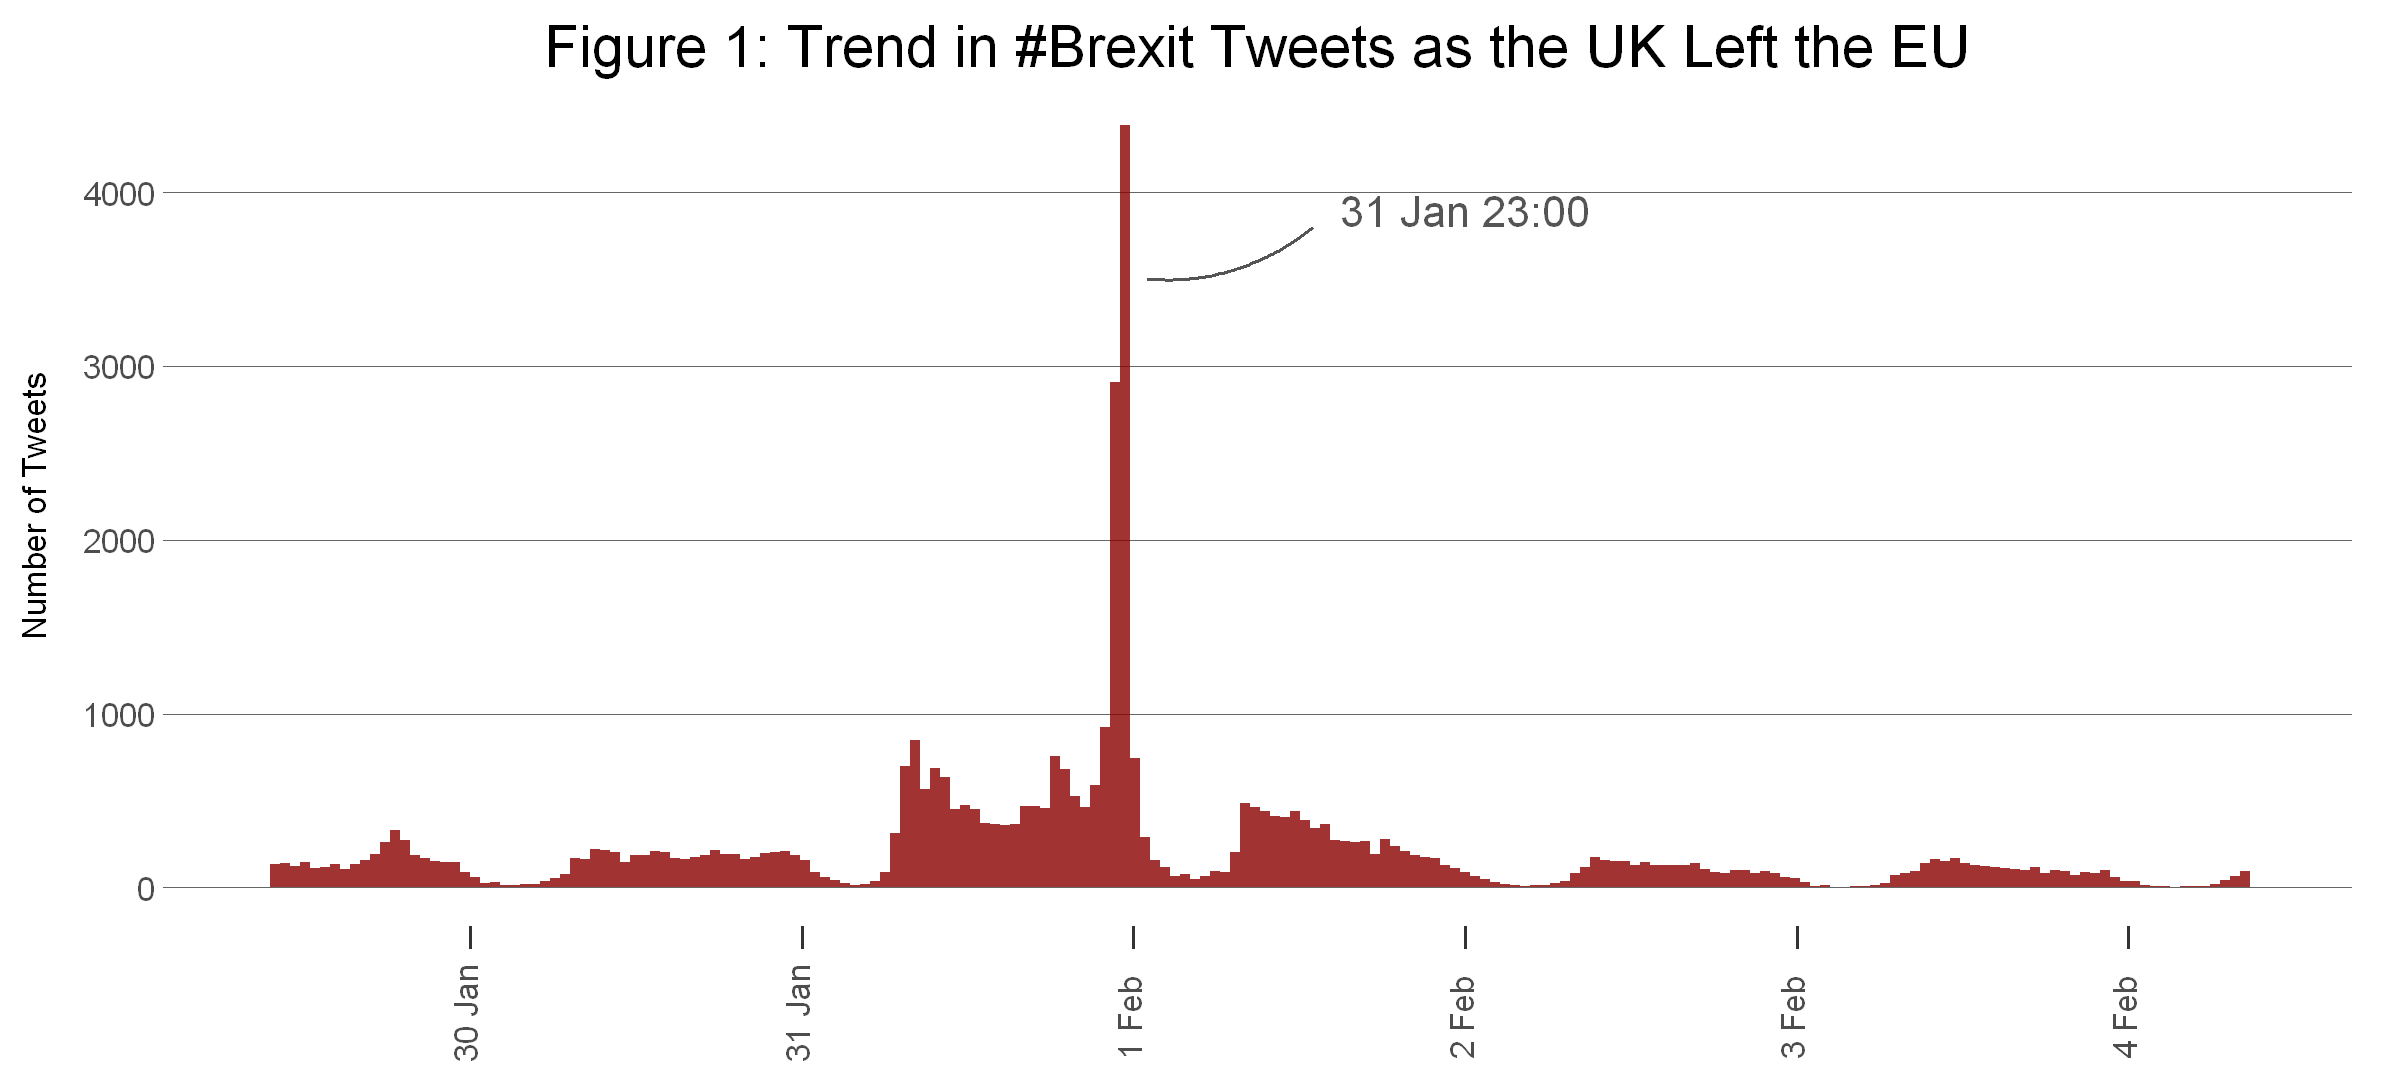

In [148]:
library(ggplot2)
library(lubridate)
library(repr)
library(sentimentr)
library(tidytext)
library(dplyr)

load("brexit_tweets.Rda")

tweets$datetime<- paste(tweets$datestr, tweets$timestr, sep = " ")
tweets$datetime<- dmy_hm(tweets$datetime)

options(repr.plot.width = 20, repr.plot.height = 9)

ggplot(tweets)+
  geom_histogram(aes(x = datetime), bins = 200, fill = "darkred", color = "NA", alpha = 0.8)+
  scale_x_datetime(limits = c(as.POSIXct("2020-01-29 09:00", tz = "GMT"), as.POSIXct("2020-02-04 09:00", tz = "GMT")), date_breaks = "1 day", date_minor_breaks = "6 hours", date_labels = "%e %h")+
  scale_y_continuous(limits = c(0, 4386))+
  ggtitle(label = "Figure 1: Trend in #Brexit Tweets as the UK Left the EU")+
  theme(axis.ticks.x = element_line(size = 1),
        axis.text = element_text(size = 20),
        axis.text.x = element_text(angle = 90, vjust = 0.3, hjust = -1, size = 20),
        plot.title = element_text(hjust = 0.5, size = 35),
        axis.title = element_text(),
        axis.title.x = element_blank(),
        axis.title.y = element_text(vjust = 5, hjust = 0.5, size = 20),
        axis.ticks.y = element_blank(),
        axis.ticks.length.x = unit(0.5, "cm"),
        panel.background = element_blank(),
        panel.grid = element_blank(),
        panel.grid.major.y = element_line(color = "gray40", size = 0.5),
        plot.margin = unit(c(0.5,1,0.5,1), units = "cm"))+
  labs(y = "Number of Tweets")+
  annotate("curve", x = as.POSIXct("2020-02-01 01:00", tz = "GMT"), y = 3500, xend = as.POSIXct("2020-02-01 13:00", tz = "GMT"), yend = 3800, curvature = 0.2, color = "#555555", size = 1)+
  annotate("text", x = as.POSIXct("2020-02-02 00:00", tz = "GMT"), y = 3900, label = "31 Jan 23:00", size = 9, color = "#555555")

<p>Unsurprisingly, we can clearly see a very large spike at 23.00 on 31st January, the hour that the UK officially left the UK. Additionally, the day of the 31st, as well as the morning after the UK left, saw higher frequencies of Tweets.</p>

<p>Being Tweets, this data lends itself to textual analysis. A relatively simply way to get information out of the Tweet texts is to use sentiment analysis to get an idea of how negative/positive the discourse on Twitter was. Various packages in R provide tools for doing this, with varying degrees of complexity and speed. Below we use the 'sentimentr' package to demonstrate getting a sentiment score for each tweet, due to its relative speed. However in the dataset we already have sentiment scores produced using the <a href = https://nlp.stanford.edu/sentiment/index.html > Stanford NLP sentiment analysis</a>, which is more sophisticated, but which requires more time to compute, as well as certain dependencies in order to function. For the rest of the analysis we shall use the Stanford NLP sentiment analysis scores that are already in the dataset.

In [84]:
tweets$demo_sent<- sentiment_by(get_sentences(as.character(tweets$text)))$sentiment
print("Done!")

[1] "Done!"


<p>Using the `stanford_sent` variable that is already in the dataset, we can now investigate any patterns in the sentiment of the Tweets. Again, this is using the Stanford sentiment analysis scores, but could equally be done using the `demo_sent` variable produced above. This particular implementation of the Stanford sentiment analysis in R gives scores rangeing between -1 and 1, with negative scores for negative sentiment, 0 for neutral sentiment and positive scores for positive sentiment.  The algorithm only assigns a general score of -1, -0.5, 0, 0.5 or 1. This means sentiment isn't being measured on a fine scale, but we can be more confident of the reliability of the measure since it is not making precise claims about the sentiment. In the dataset, each Tweet's score is the mean of the scores for each sentence in the Tweet text.</p>
<p>Firstly, we'll look at the distribution of the scores:</p>

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."


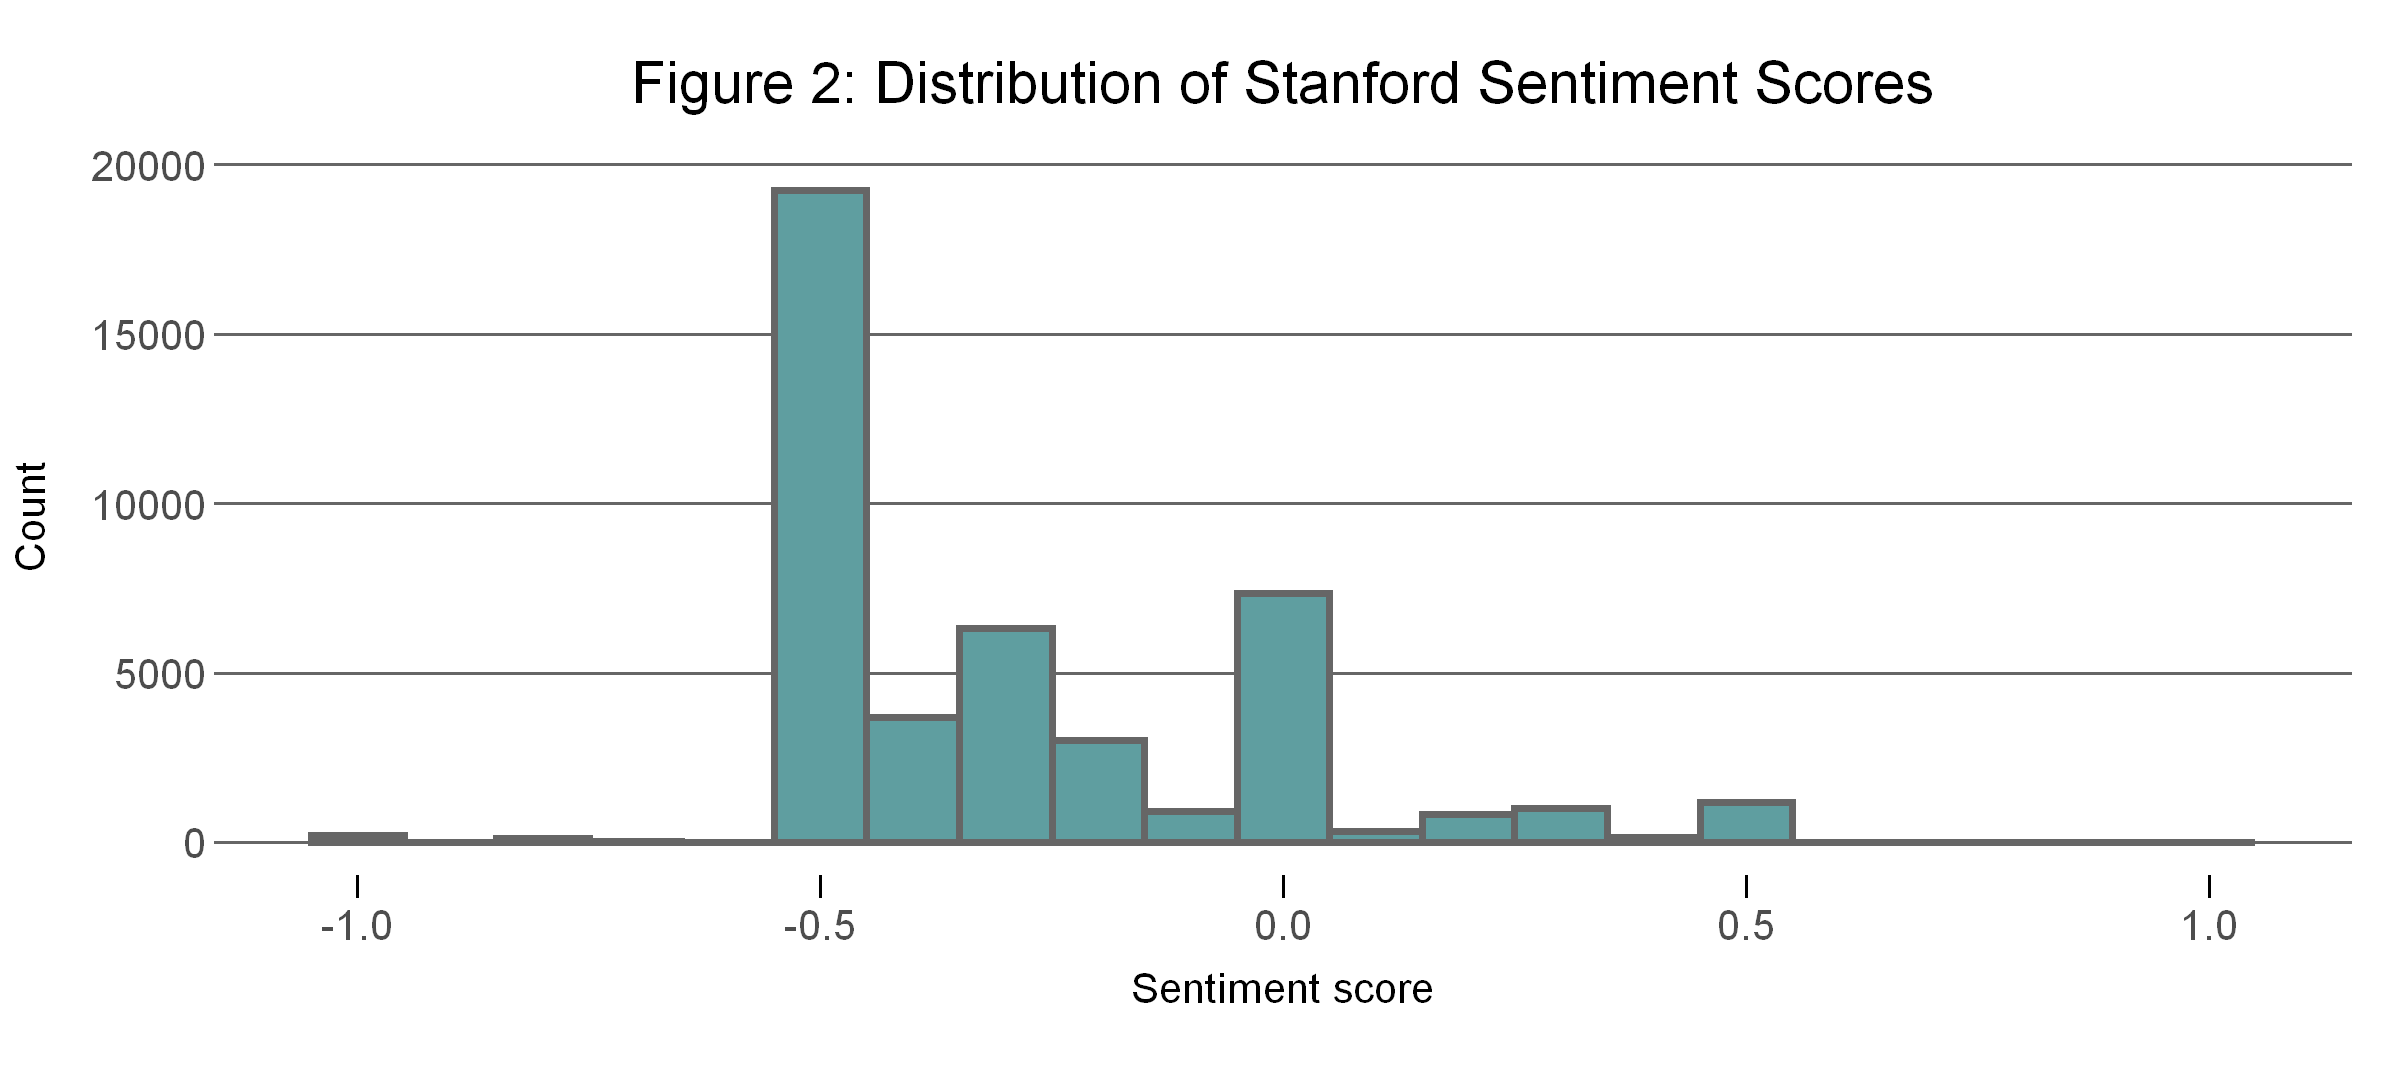

In [136]:
p<- ggplot(tweets)+
  geom_histogram(aes(x = stanford_sent), fill = "cadetblue", binwidth = 0.1, color = "gray40", size = 2)+
  labs(x = "Sentiment score", y = "Count", title = "Figure 2: Distribution of Stanford Sentiment Scores")+
  theme(axis.text = element_text(size = 25),
        axis.text.x = element_text(vjust = 0.3, size = 25),
        plot.title = element_text(hjust = 0.5, size = 35, vjust = 4),
        axis.title.y = element_text(vjust = 5, hjust = 0.5, size = 25),
        axis.title.x = element_text(vjust = -2, hjust = 0.5, size = 25),
        axis.ticks = element_blank(),
        axis.ticks.x = element_line(size = 1),
        axis.ticks.length.x = unit(0.5, "cm"),
        panel.background = element_blank(),
        panel.grid = element_blank(),
        panel.grid.major.y = element_line(color = "gray40", size = 1),
        plot.margin = unit(c(2,1,2,1), units = "cm"))

p

<p>We can see from Figure 2, that the scores are not very evenly distributed - by far the majority have a negative score. It is again worth highlight here that we are looking at the discourse on Brexit of the tweeting section of the population who tend (amongst other things) to be more politically liberal than the general population <a href = https://journals.sagepub.com/doi/full/10.1177/2053168017720008 >(Mellon and Prosser, 2017).</a></p>
<p>We can visualise how the sentiment of Tweets changed over the week by plotting the proportions of Tweets that fall into the broad categories of "Negative", "Neutral" and "Positive" for each day:</p>

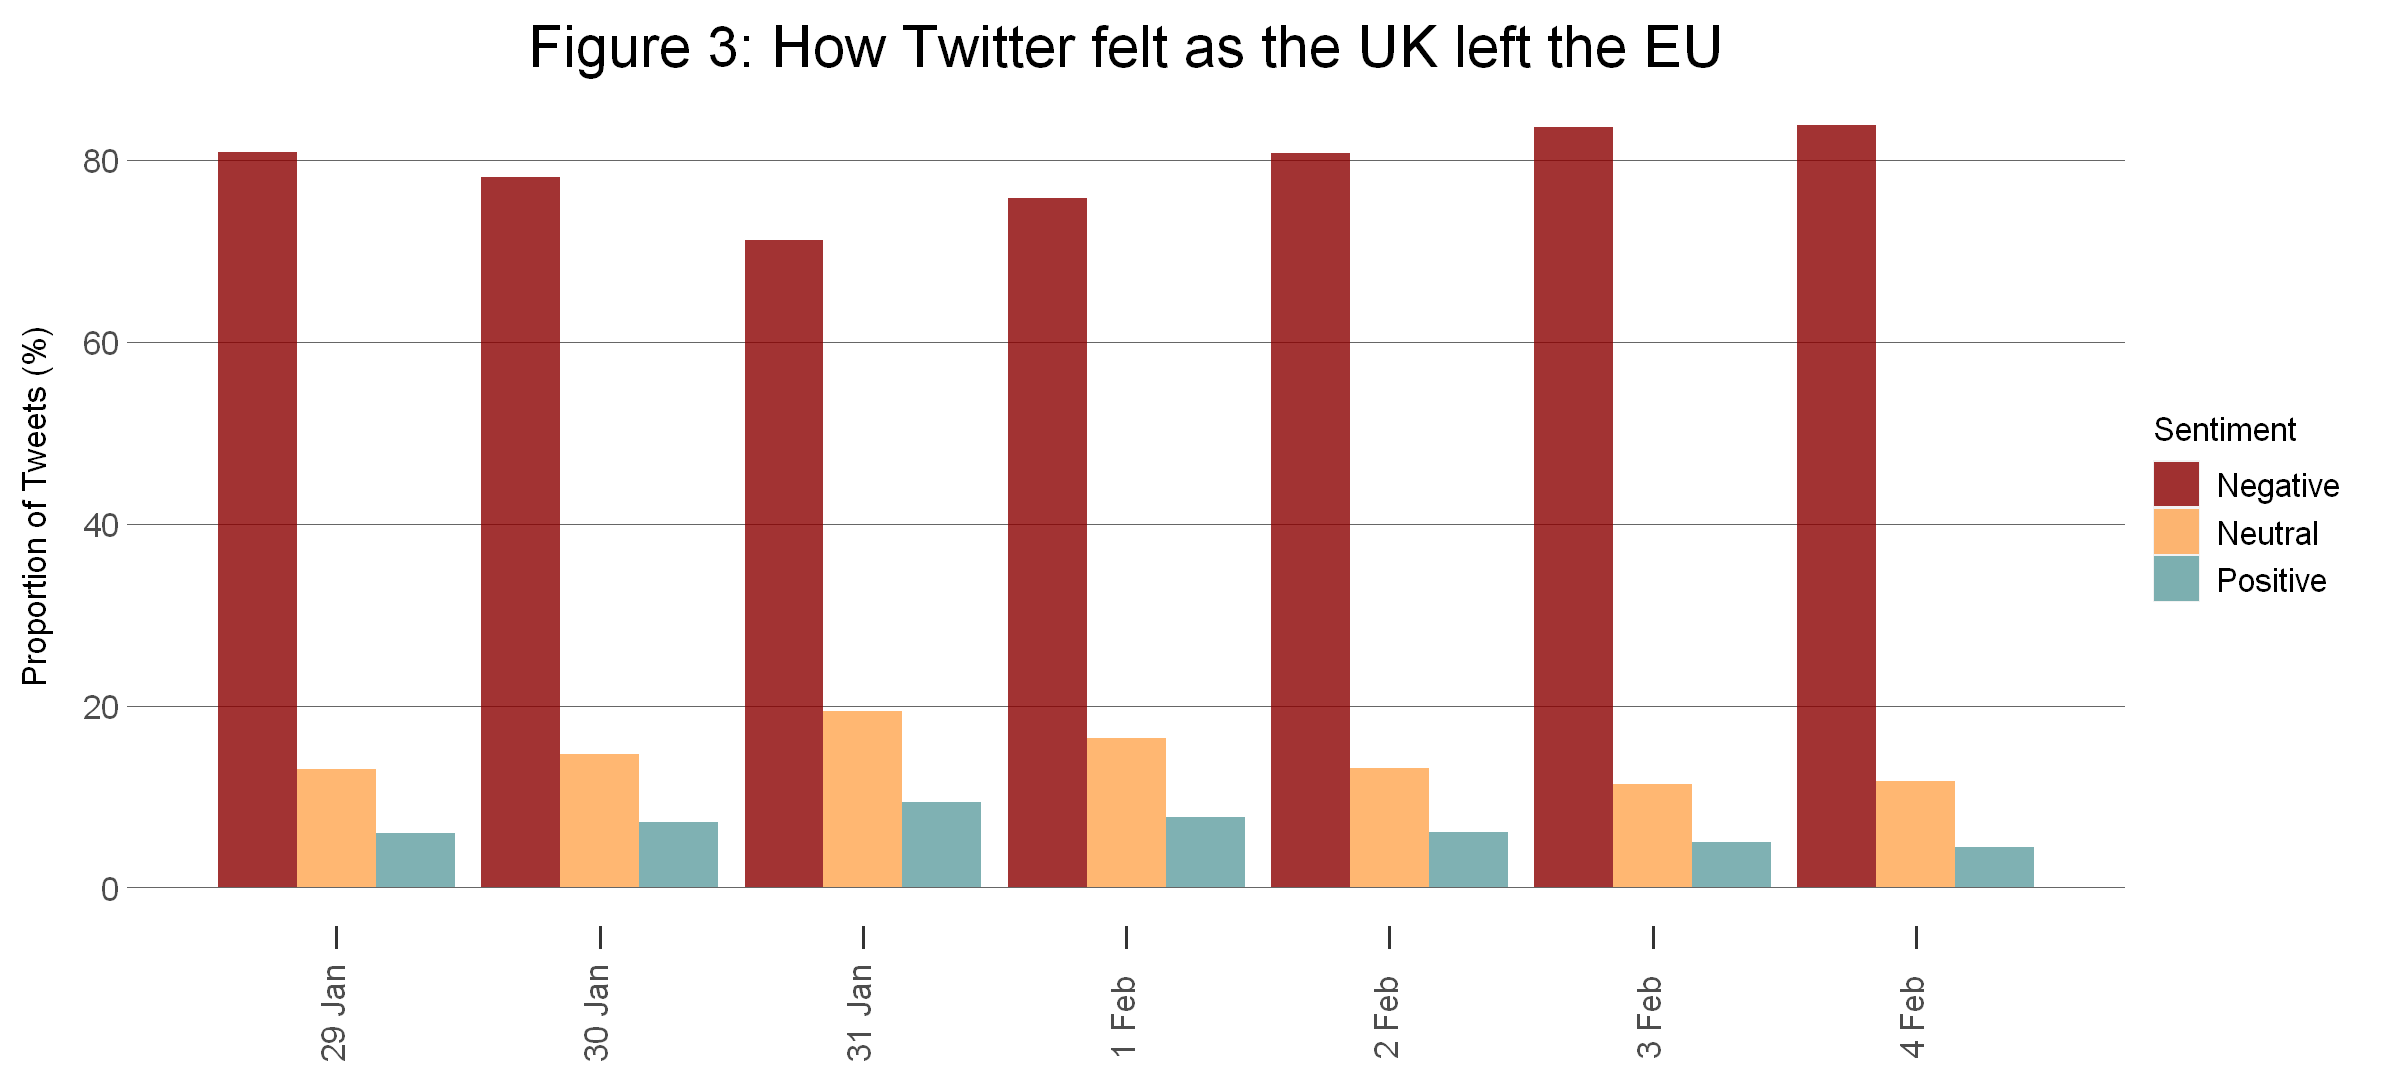

In [144]:
tweets$sent_cat[tweets$stanford_sent==0]<- "Neutral"
tweets$sent_cat[tweets$stanford_sent>0]<- "Positive"
tweets$sent_cat[tweets$stanford_sent<0]<- "Negative"

tweets$datel<- dmy(tweets$datestr)

df<- data.frame(prop.table(table(tweets$sent_cat, tweets$datel), margin = 2)*100)
colnames(df)<- c("Sentiment", "date", "proportion")
df$date<- ymd(df$date) 
df<- df[c(-1, -2, -3, -25, -26, -27),]

ggplot(df)+
  geom_col(aes(x = date, y = proportion, fill = Sentiment), position = "dodge", alpha = 0.8)+
  scale_x_date(date_breaks = "1 day", date_labels = "%e %h")+
  scale_fill_manual(values = c("darkred", "tan1", "cadetblue"))+
  labs(y = "Proportion of Tweets (%)", title = "Figure 3: How Twitter felt as the UK left the EU")+
  theme(axis.ticks.x = element_line(size = 1),
        axis.text = element_text(size = 20),
        axis.text.x = element_text(angle = 90, vjust = 0.3, hjust = -1, size = 20),
        plot.title = element_text(hjust = 0.5, size = 35),
        axis.title = element_text(),
        axis.title.x = element_blank(),
        axis.title.y = element_text(vjust = 5, hjust = 0.5, size = 20),
        axis.ticks.y = element_blank(),
        axis.ticks.length.x = unit(0.5, "cm"),
        panel.background = element_blank(),
        panel.grid = element_blank(),
        panel.grid.major.y = element_line(color = "gray40", size = 0.5),
        plot.margin = unit(c(0.5,1,0.5,1), units = "cm"),
        legend.text = element_text(size = 20),
        legend.key.size = unit(1, "cm"),
        legend.title = element_text(size = 20))



<p>Figure 3 confirms what we saw in the histogram above: by far the majority of Tweets have a negative sentiment score. Across days, the mean proportion of negative Tweets was 79%. However we also see a trend of Tweets becoming more neutral/positive around the 31st January, and then becoming more negative again after this. This could be due to the large number of "Happy Brexit Day" type Tweets on the 31st January. This requires further invesitgation.</p>
<p>One way of exploring the sentiment further is looking at the words in each Tweet, and how they relate to the sentiment scores. Using the "tidytext" package, we can use token approach to get a dataset of word frequencies. From here we can look at the most common words in the most negative/positive Tweets. Note that we filter out the words "brexit", "eu" and "uk" since the presence of these words is not particularly interesting (since all the Tweets are about Brexit) and they are so ubiquitous in the Tweets that they obscure the other words in the analysis.</p>

Joining, by = "word"

Joining, by = "word"

Warning message:
"Column `word` joining character vector and factor, coercing into character vector"


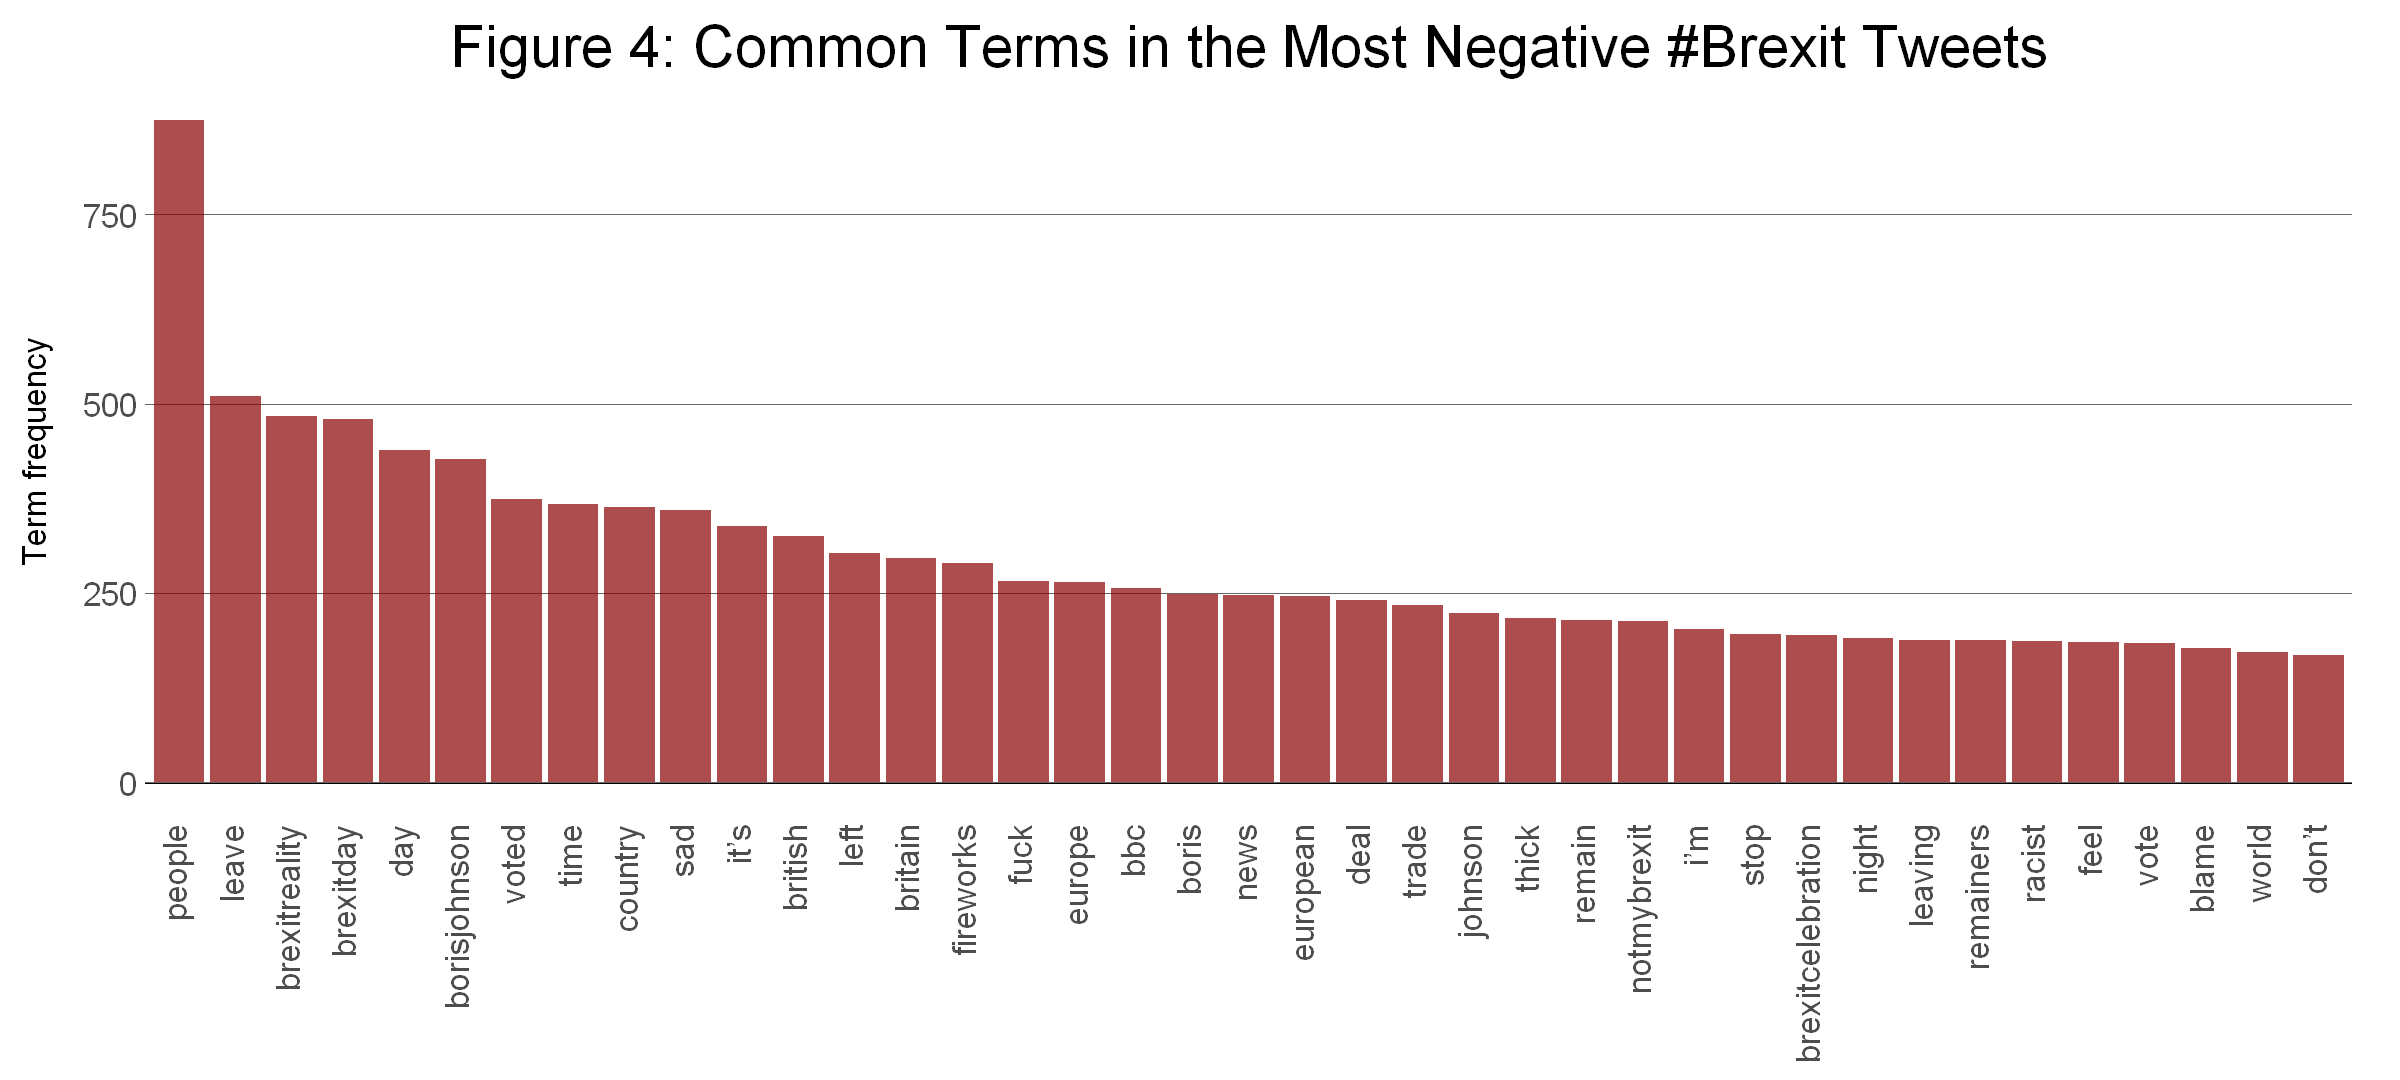

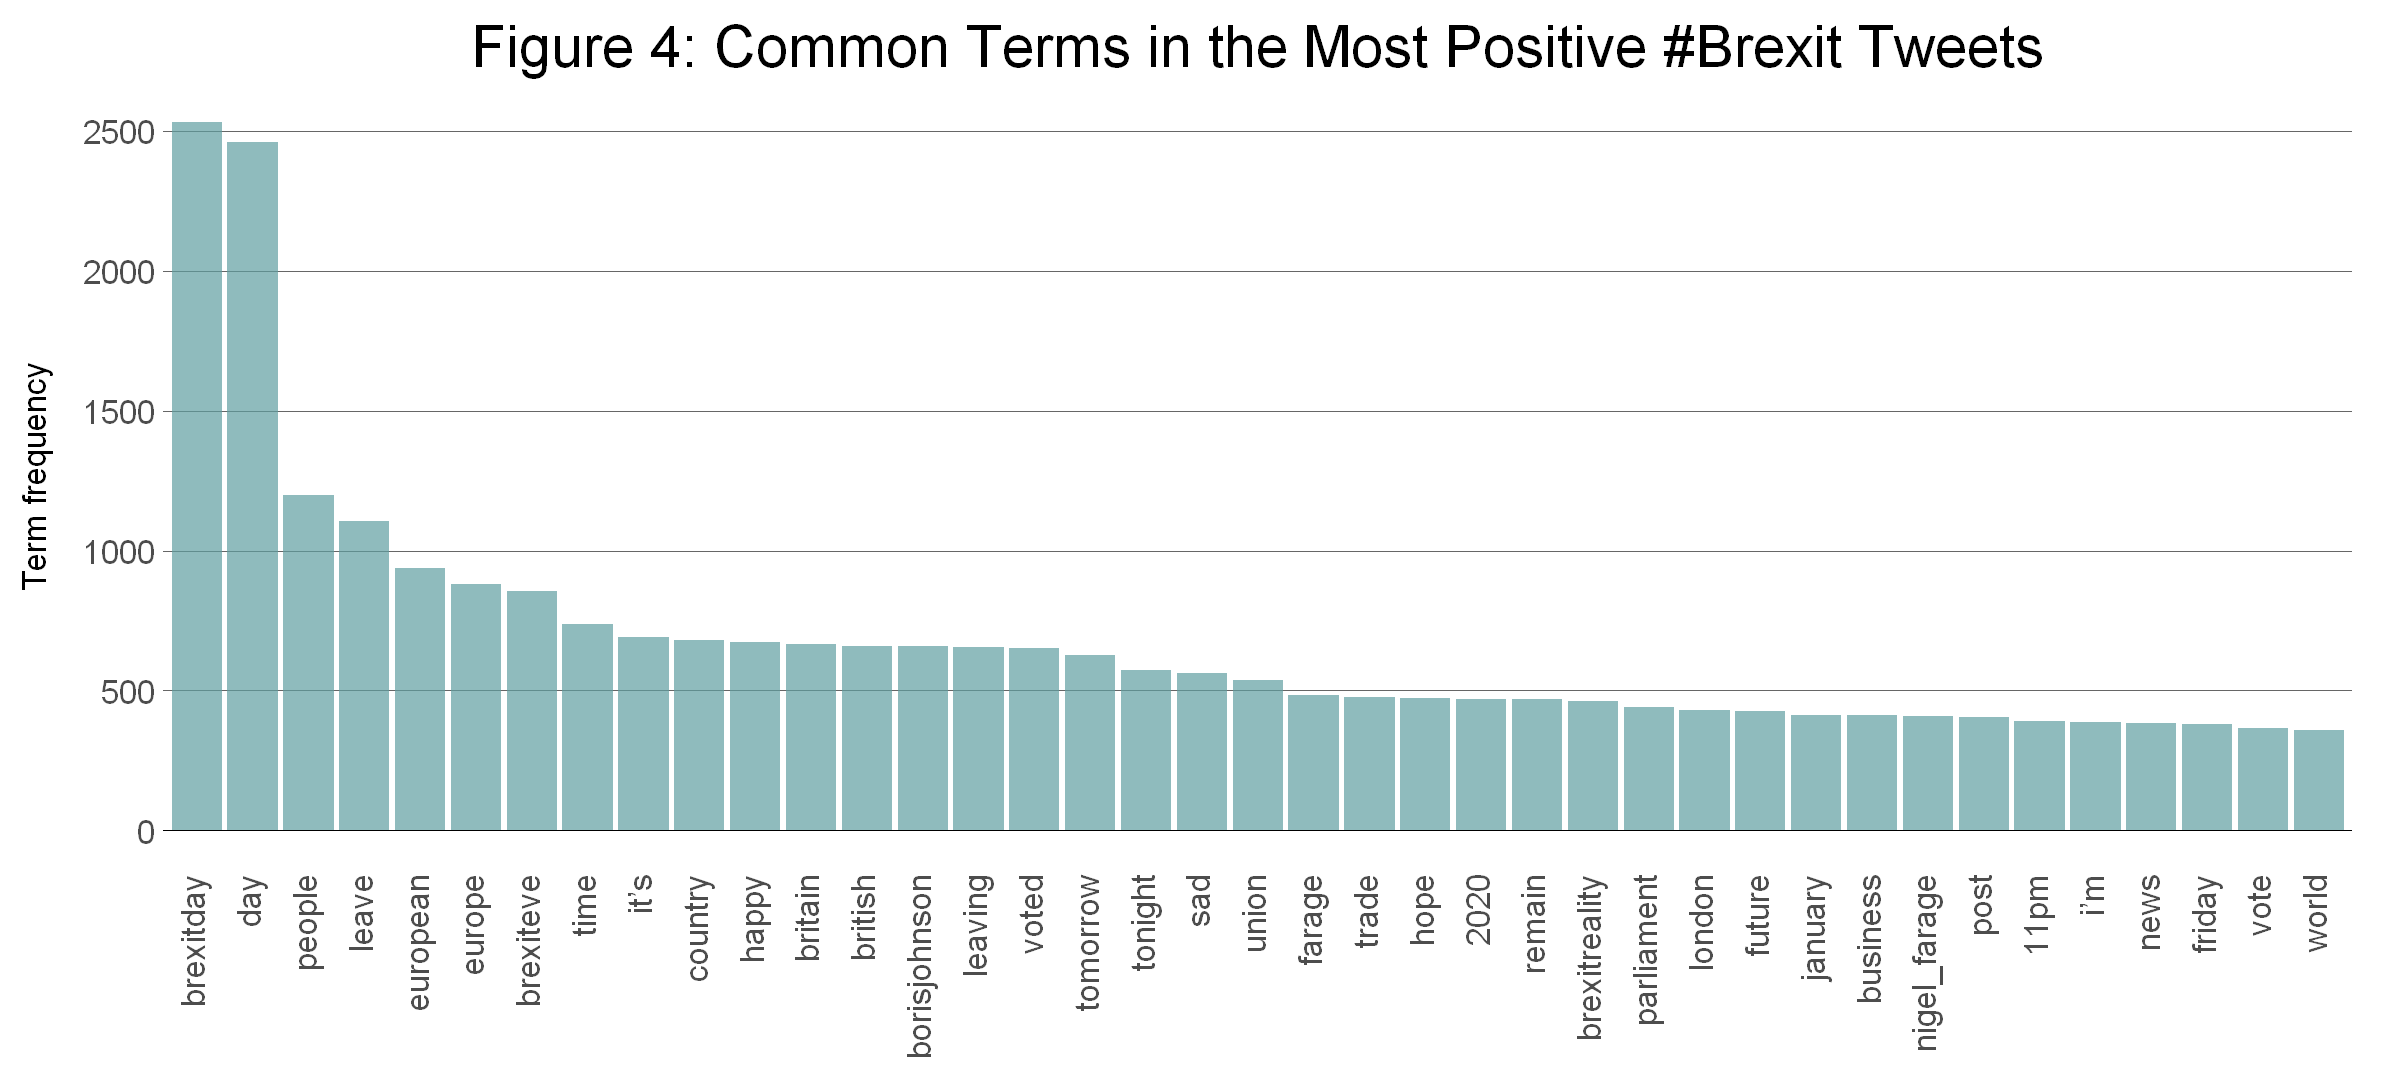

In [162]:
tdf<- unnest_tokens(tweets, word, text)
tdf<- anti_join(tdf, stop_words)
elim<- data.frame(word = c("brexit", "eu", "uk", "t.co", "https", "ðÿ", "â", "amp", "iâ", "ó", "ï", "ðÿz", "itâ", "ºðÿ", "donâ"))
tdf<- anti_join(tdf, elim)
neg<- tdf[tdf$sent < -0.5,]
pos<- tdf[tdf$sent > 0.5,]
neg_freq<- count(neg, word, sort = TRUE)
pos_freq<- count(pos, word, sort = TRUE)
top_neg<- neg_freq[1:40,]
top_pos<- pos_freq[1:40,]
top_neg<- mutate(top_neg, word = reorder(word, desc(n)))
top_pos<- mutate(top_pos, word = reorder(word, desc(n)))

ggplot(top_neg)+
  geom_col(aes(x = word, y = n), fill = "darkred", alpha = 0.7, color = NA)+
  geom_hline(yintercept = -0.1, size = 0.2)+
  ggtitle(label = "Figure 4: Common Terms in the Most Negative #Brexit Tweets")+
  labs(y = "Term frequency")+
  theme(axis.text = element_text(size = 20),
        axis.text.x = element_text(angle = 90, vjust = 0.3, hjust = 1, size = 20),
        plot.title = element_text(hjust = 0.5, size = 35),
        axis.title = element_text(),
        axis.title.x = element_blank(),
        axis.title.y = element_text(vjust = 5, hjust = 0.5, size = 20),
        axis.ticks = element_blank(),
        panel.background = element_blank(),
        panel.grid = element_blank(),
        panel.grid.major.y = element_line(color = "gray40", size = 0.5),
        plot.margin = unit(c(0.5,1,0.5,1), units = "cm"))

ggplot(top_pos)+
  geom_col(aes(x = word, y = n), fill = "cadetblue", alpha = 0.7, color = NA)+
  geom_hline(yintercept = -0.1, size = 0.2)+
  ggtitle(label = "Figure 5: Common Terms in the Most Positive #Brexit Tweets")+
  labs(y = "Term frequency")+
  theme(axis.text = element_text(size = 20),
        axis.text.x = element_text(angle = 90, vjust = 0.3, hjust = 1, size = 20),
        plot.title = element_text(hjust = 0.5, size = 35),
        axis.title = element_text(),
        axis.title.x = element_blank(),
        axis.title.y = element_text(vjust = 5, hjust = 0.5, size = 20),
        axis.ticks = element_blank(),
        panel.background = element_blank(),
        panel.grid = element_blank(),
        panel.grid.major.y = element_line(color = "gray40", size = 0.5),
        plot.margin = unit(c(0.5,1,0.5,1), units = "cm"))

<p>We can see from Figures 4 and 5 that the most negative and positive Tweets share some common terms. Some are not so surprising - such as "people", "leave" and "brexitday" - but others are more interesting. For example, it is noteworthy that "borisjohnson" being tweeted about in both the most negative and positive Tweets. At the same time, there are also words that are unique to either the negative or positive Tweets, and so give a sense of the language and topics involved at each end of the spectrum. In the negative tweets we have terms such as "racist" and "thick", which reflects some of the ways Remain-supporting Twitter users characterised Leave voters (this is confirmed if we look into the original Tweets that these come from). The term "bbc" is also a common word in the most negative Tweets, and when we look into this we see that it is largely due to Tweets arguing about alleged bias in the BBC's coverage of Brexit Day. On the other hand, in the most positive Tweets, we see that "country", "britain" and "british" are paricularly common. On looking into the Tweets these terms come from, a lot seem to be talking about ideas of pride and patriotism, though this requires further invesitgation. Equally, "nigel_farage", "parliament" and "london" are frequently in the most positive Tweets, mainly due to Tweets celebrating Nigel Farage's speech in Parliament Square on the even of Brexit.<p>
    
**Project to be continued...**